<a href="https://colab.research.google.com/github/sarojkumarpramanik/Melanoma-Detection/blob/main/Melanoma_Detection_Assignment_Saroj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------
-------------------------
# <font color = green> *Melanoma Detection Assignment*
    
    Prepared By - Saroj, Sampa & Shyam
    Group       - DSC45
    Date        - 11 Apr 2023
    
-------------------------
-------------------------

__*Problem statement:*__ To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

---
###<font color = Blue> ***Note: I have removed the long non-informative output to provide a clearer view of the information.***
---

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip /content/gdrive/MyDrive/Melanoma_Detection_Assignment/UpGrad/CNN_assignment.zip

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
!ls

 gdrive       'Skin cancer ISIC The International Skin Imaging Collaboration'
 sample_data


In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
data_dir_train

PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [ ]:
data_dir_test

PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                                data_dir_train,
                                                                seed=123,
                                                                validation_split = 0.2,
                                                                subset = 'training',
                                                                image_size= (img_height, img_width),
                                                                batch_size= batch_size
                                                               )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                              data_dir_train,
                                                              seed=123,
                                                              validation_split = 0.2,
                                                              subset = 'validation',
                                                              image_size= (img_height, img_width),
                                                              batch_size= batch_size
                                                             )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

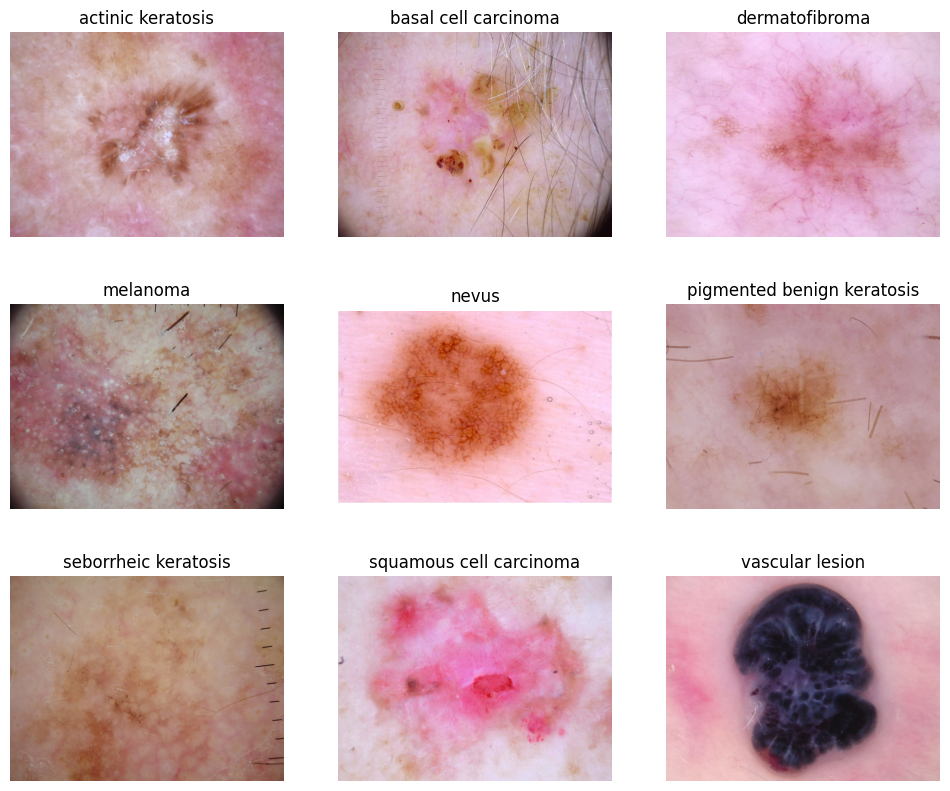

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
for images, labels in zip(class_names,range(9)):
    ax = plt.subplot(3,3,labels+1)
    file1=os.listdir(os.path.join(data_dir_train,images))[1]
    image = plt.imread(os.path.join(data_dir_train,images,file1))
    plt.imshow(image.astype('uint8'))
    plt.title(images)
    plt.axis("off")

In [ ]:
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,dermatofibroma,95
1,vascular lesion,139
2,actinic keratosis,114
3,squamous cell carcinoma,181
4,pigmented benign keratosis,462
5,nevus,357
6,basal cell carcinoma,376
7,seborrheic keratosis,77
8,melanoma,438


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    layers.Conv2D(16,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(32,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(64,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 26s 69ms/step - loss: 1.9168 - accuracy: 0.2980 - val_loss: 1.6867 - val_accuracy: 0.4139
Epoch 2/20
56/56 [==============================] - 1s 20ms/step - loss: 1.5440 - accuracy: 0.4660 - val_loss: 1.4474 - val_accuracy: 0.5324
Epoch 3/20
56/56 [==============================] - 1s 20ms/step - loss: 1.3608 - accuracy: 0.5312 - val_loss: 1.3667 - val_accuracy: 0.5548
Epoch 4/20
56/56 [==============================] - 1s 20ms/step - loss: 1.3123 - accuracy: 0.5402 - val_loss: 1.3787 - val_accuracy: 0.5391
Epoch 5/20
56/56 [==============================] - 1s 20ms/step - loss: 1.2462 - accuracy: 0.5580 - val_loss: 1.3945 - val_accuracy: 0.5526
Epoch 6/20
56/56 [==============================] - 1s 19ms/step - loss: 1.0888 - accuracy: 0.6055 - val_loss: 1.4135 - val_accuracy: 0.5168
Epoch 7/20
56/56 [==============================] - 1s 21ms/step - loss: 0.9840 - accuracy: 0.6579 - val_loss: 1.4204 - val_accuracy: 0.5436
Epoch 8/20
5

### Visualizing training results

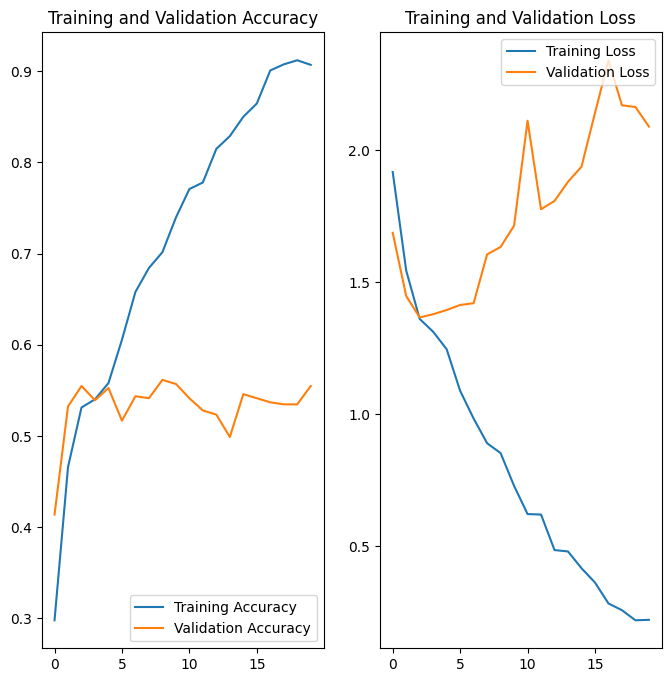

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

###Insights<br>
- As we observed after running for 20 epochs,the training accuracy is high, which indicates a good model.
- The difference between train and validation accuracy is approximately 30% which shows that our model is overfitting.
- We need to do data augmentation to treat the same.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (img_height, img_width,3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1)
    ]
)

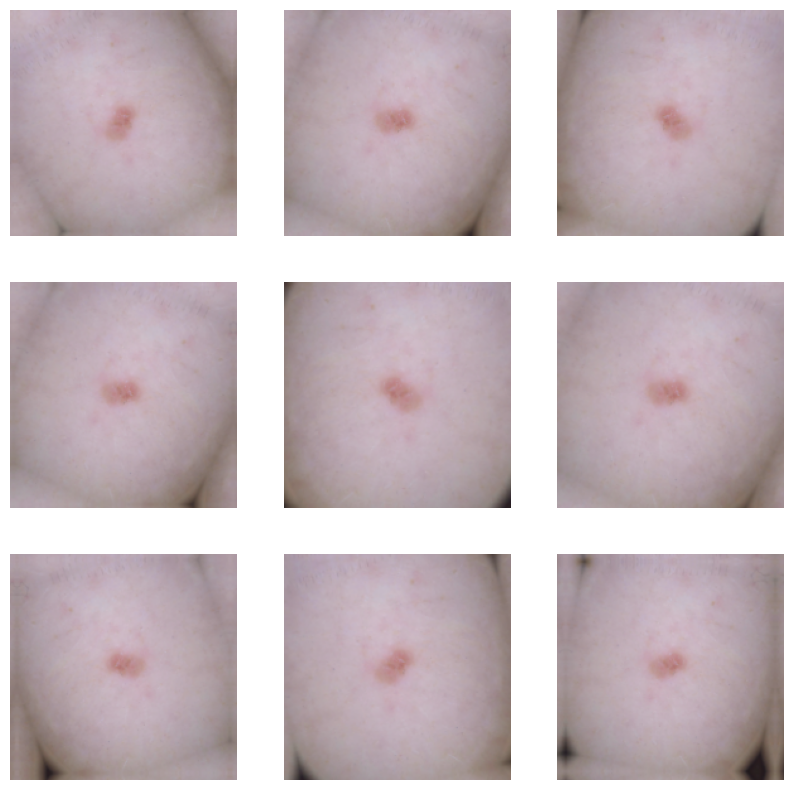

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(10,10))

for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis("off");

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
                    data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255),
                    layers.Conv2D(16,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(32,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(64,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 32ms/step - loss: 2.0857 - accuracy: 0.2656 - val_loss: 1.8116 - val_accuracy: 0.3468
Epoch 2/20
56/56 [==============================] - 2s 28ms/step - loss: 1.7121 - accuracy: 0.3973 - val_loss: 1.5638 - val_accuracy: 0.4720
Epoch 3/20
56/56 [==============================] - 2s 29ms/step - loss: 1.5165 - accuracy: 0.4693 - val_loss: 1.5748 - val_accuracy: 0.4855
Epoch 4/20
56/56 [==============================] - 2s 28ms/step - loss: 1.4236 - accuracy: 0.4916 - val_loss: 1.4356 - val_accuracy: 0.5078
Epoch 5/20
56/56 [==============================] - 2s 28ms/step - loss: 1.3676 - accuracy: 0.5140 - val_loss: 1.4004 - val_accuracy: 0.5101
Epoch 6/20
56/56 [==============================] - 2s 29ms/step - loss: 1.3280 - accuracy: 0.5340 - val_loss: 1.3766 - val_accuracy: 0.5347
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 1.3403 - accuracy: 0.5257 - val_loss: 1.3082 - val_accuracy: 0.5414
Epoch 8/20
56

### Visualizing the results

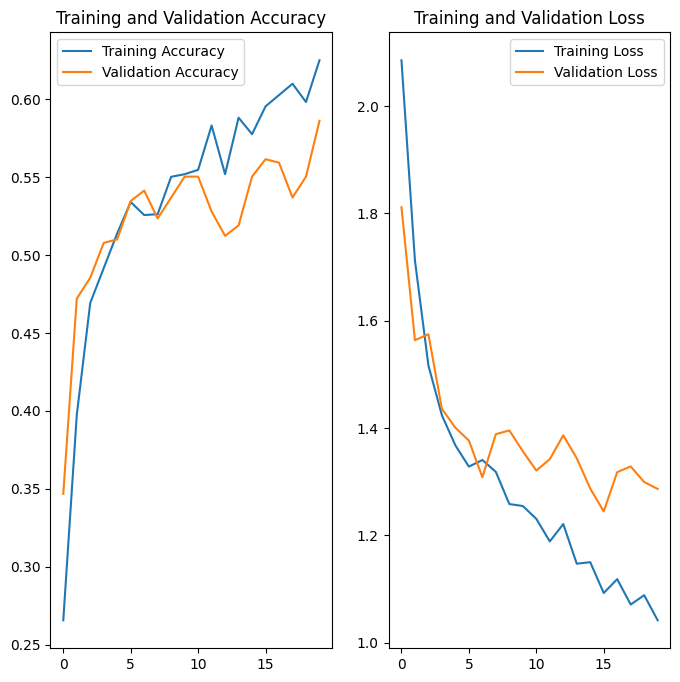

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

###Insights<br>
- After data augmentation and using dropout layer the model is not overfitting anymore which is indicated by the difference between train and validation accuracy which is close to 7% now.
- But the model is performing very poorly now which is clear inidication of underfitting now.
- The possible reason for the same can be class imbalance . 
- In next few steps we will see how to check and treat the same.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
from glob import  glob
path_list = [ x for x in glob(os.path.join(data_dir_train, "*", "*.jpg")) ]
path_list

In [ ]:
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, "*", "*.jpg")) ]
lesion_list

In [ ]:
print(len(lesion_list))
print(type(lesion_list))

2239
<class 'list'>


In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
dataframe_dict_original

In [ ]:
skin_df = pd.DataFrame(list(dataframe_dict_original.items()), columns= ['Path', 'Label'])
print(skin_df.shape)
skin_df.head()

(2239, 2)


,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
1,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
2,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
3,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
4,Skin cancer ISIC The International Skin Imagin...,dermatofibroma


In [ ]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder

labelencoder = LabelEncoder()

In [ ]:
skin_df['Skin_df_cat']=labelencoder.fit_transform(skin_df['Label'])
skin_df['Skin_df_cat']

0       2
1       2
2       2
3       2
4       2
       ..
2234    3
2235    3
2236    3
2237    3
2238    3
Name: Skin_df_cat, Length: 2239, dtype: int64

In [ ]:
skin_df['Skin_df_cat'].value_counts()

5    462
3    438
1    376
4    357
7    181
8    139
0    114
2     95
6     77
Name: Skin_df_cat, dtype: int64

In [ ]:
skin_df['Skin_df_cat'].value_counts(normalize=True)


5    0.206342
3    0.195623
1    0.167932
4    0.159446
7    0.080840
8    0.062081
0    0.050916
2    0.042430
6    0.034390
Name: Skin_df_cat, dtype: float64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
   ***The sample count for Class 6 is the lowest among all classes, with a count of only 77.***
#### - Which classes dominate the data in terms proportionate number of samples?
  ***Class 5 represents a higher proportion of the total sample compared to other classes, accounting for 20% of the total sample.***


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD1C2407B80>: 100%|██████████| 500/500 [00:19<00:00, 25.24 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD1C6B8E490>: 100%|██████████| 500/500 [00:19<00:00, 25.54 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD1DB1D2130>: 100%|██████████| 500/500 [00:19<00:00, 25.69 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD1DA0D2490>: 100%|██████████| 500/500 [01:44<00:00,  4.80 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7FD1C6B8E400>: 100%|██████████| 500/500 [01:38<00:00,  5.07 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD25019CAF0>: 100%|██████████| 500/500 [00:21<00:00, 23.62 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FD2502DAC70>: 100%|██████████| 500/500 [00:49<00:00, 10.19 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD2501A8310>: 100%|██████████| 500/500 [00:21<00:00, 23.16 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD250194640>: 100%|██████████| 500/500 [00:21<00:00, 23.48 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = skin_df.append(df2)

<ipython-input-69-0382c5387c9c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = skin_df.append(df2)


In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
# data_dir_train="path to directory with training data + data created using augmentor"
# Has been done in the previous step, addition of files from augmentor and training data.

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                                data_dir_train,
                                                                seed=123,
                                                                validation_split = 0.2,
                                                                subset = 'training',
                                                                image_size=(img_height, img_width),
                                                                batch_size=batch_size
                                                               )

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                              data_dir_train,
                                                              seed=123,
                                                              validation_split = 0.2,
                                                              subset = 'validation',
                                                              image_size=(img_height, img_width),
                                                              batch_size=batch_size
                                                             )

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
model = Sequential([
                    data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255),
                    layers.Conv2D(16,3, padding='same', activation='relu'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(),
                    layers.BatchNormalization(),
                    layers.Conv2D(32,3, padding='same', activation='relu'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(),
                    layers.BatchNormalization(),
                    layers.Conv2D(64,3, padding='same', activation='relu'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(),
                    layers.BatchNormalization(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.BatchNormalization(),
                    layers.Dense(num_classes)
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 34s 168ms/step - loss: 1.5676 - accuracy: 0.4369 - val_loss: 2.7505 - val_accuracy: 0.1128
Epoch 2/50
169/169 [==============================] - 29s 166ms/step - loss: 1.2525 - accuracy: 0.5365 - val_loss: 2.5490 - val_accuracy: 0.1945
Epoch 3/50
169/169 [==============================] - 29s 166ms/step - loss: 1.1100 - accuracy: 0.5772 - val_loss: 1.4701 - val_accuracy: 0.4417
Epoch 4/50
169/169 [==============================] - 29s 167ms/step - loss: 1.0238 - accuracy: 0.6191 - val_loss: 1.3743 - val_accuracy: 0.5011
Epoch 5/50
169/169 [==============================] - 29s 168ms/step - loss: 0.9378 - accuracy: 0.6537 - val_loss: 1.5429 - val_accuracy: 0.4633
Epoch 6/50
169/169 [==============================] - 29s 167ms/step - loss: 0.8863 - accuracy: 0.6727 - val_loss: 1.4070 - val_accuracy: 0.5056
Epoch 7/50
169/169 [==============================] - 30s 172ms/step - loss: 0.8487 - accuracy: 0.6782 - val_loss: 1.4681 - val_ac

#### **Todo:**  Visualize the model results

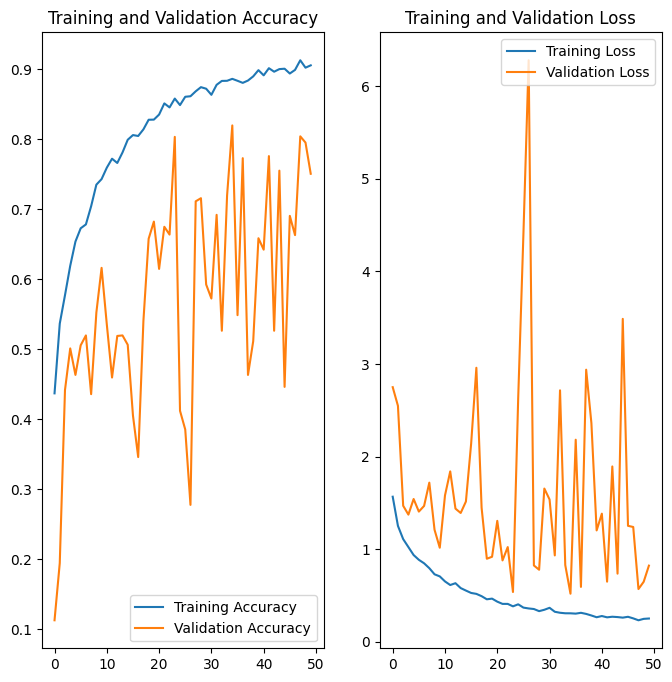

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### This is the model which is suitable for this problem .<br>
- 
As now we see both underfitting and overfitting problem is now resolved.

# Summary 
1. A machine learning model was developed using a training dataset and a validation dataset.

2. During training, the model achieved a high accuracy, which initially suggested good performance.

3. However, when the model was tested on the validation dataset, its accuracy was found to be poor.

4. This suggested that the model was overfitting, meaning it was too closely tailored to the training dataset and therefore performed poorly on new data.

5. To overcome overfitting, data augmentation techniques were applied to the training dataset to increase its size and diversity, and make the model more robust to variations in the data.

6. The model was rebuilt using the augmented dataset.

7. While the training and validation accuracies were now similar, they were both still poor.

8. This indicated that the model was now underfitting, meaning it was too simple to accurately capture the patterns in the data.

9. The main cause of underfitting was found to be class imbalance in the data, where some classes had very few examples, making it difficult for the model to learn how to classify them correctly.

10. To address class imbalance, an augmentor package was used to generate more examples of the sparse classes, making the dataset more balanced.

11. The augmentor package added more samples to the sparse classes by using techniques like rotation, scaling, and flipping, to increase the variety of the data.

12. The model was rebuilt once again using the augmented and balanced dataset.

13. This time, the performance of the model was good, with a training accuracy of 91%, indicating that it was able to effectively learn from the data and generalize to new examples. This model was chosen as the final model.



------------------------------------------------------
                                            🟢    THANK YOU !    🟢

--------